# Reservoir

In [1]:
# Imports
import json
import os
import pickle

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold


import reservoirpy
from reservoirpy.observables import mse, rsquare, rmse
from reservoirpy.nodes import Reservoir, Ridge, ESN

from reservoirpy.hyper import research
from reservoirpy.hyper import plot_hyperopt_report

from utils import dataset
from utils import esn

reservoirpy.verbosity(0)
reservoirpy.set_seed(1421)

## HP Exploration

### 1. Importance of feedback

 15%|█▌        | 15/100 [11:42<1:05:25, 46.18s/trial, best loss: 0.043987451345520345]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=5.76112e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 17%|█▋        | 17/100 [13:14<1:03:21, 45.80s/trial, best loss: 0.034287071897520276]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=1.42514e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 25%|██▌       | 25/100 [19:27<59:00, 47.20s/trial, best loss: 0.034287071897520276]  

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=9.84473e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 57%|█████▋    | 57/100 [43:48<32:36, 45.51s/trial, best loss: 0.03375561220422887] 

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=6.324e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



100%|██████████| 100/100 [1:16:36<00:00, 45.96s/trial, best loss: 0.03375561220422887]


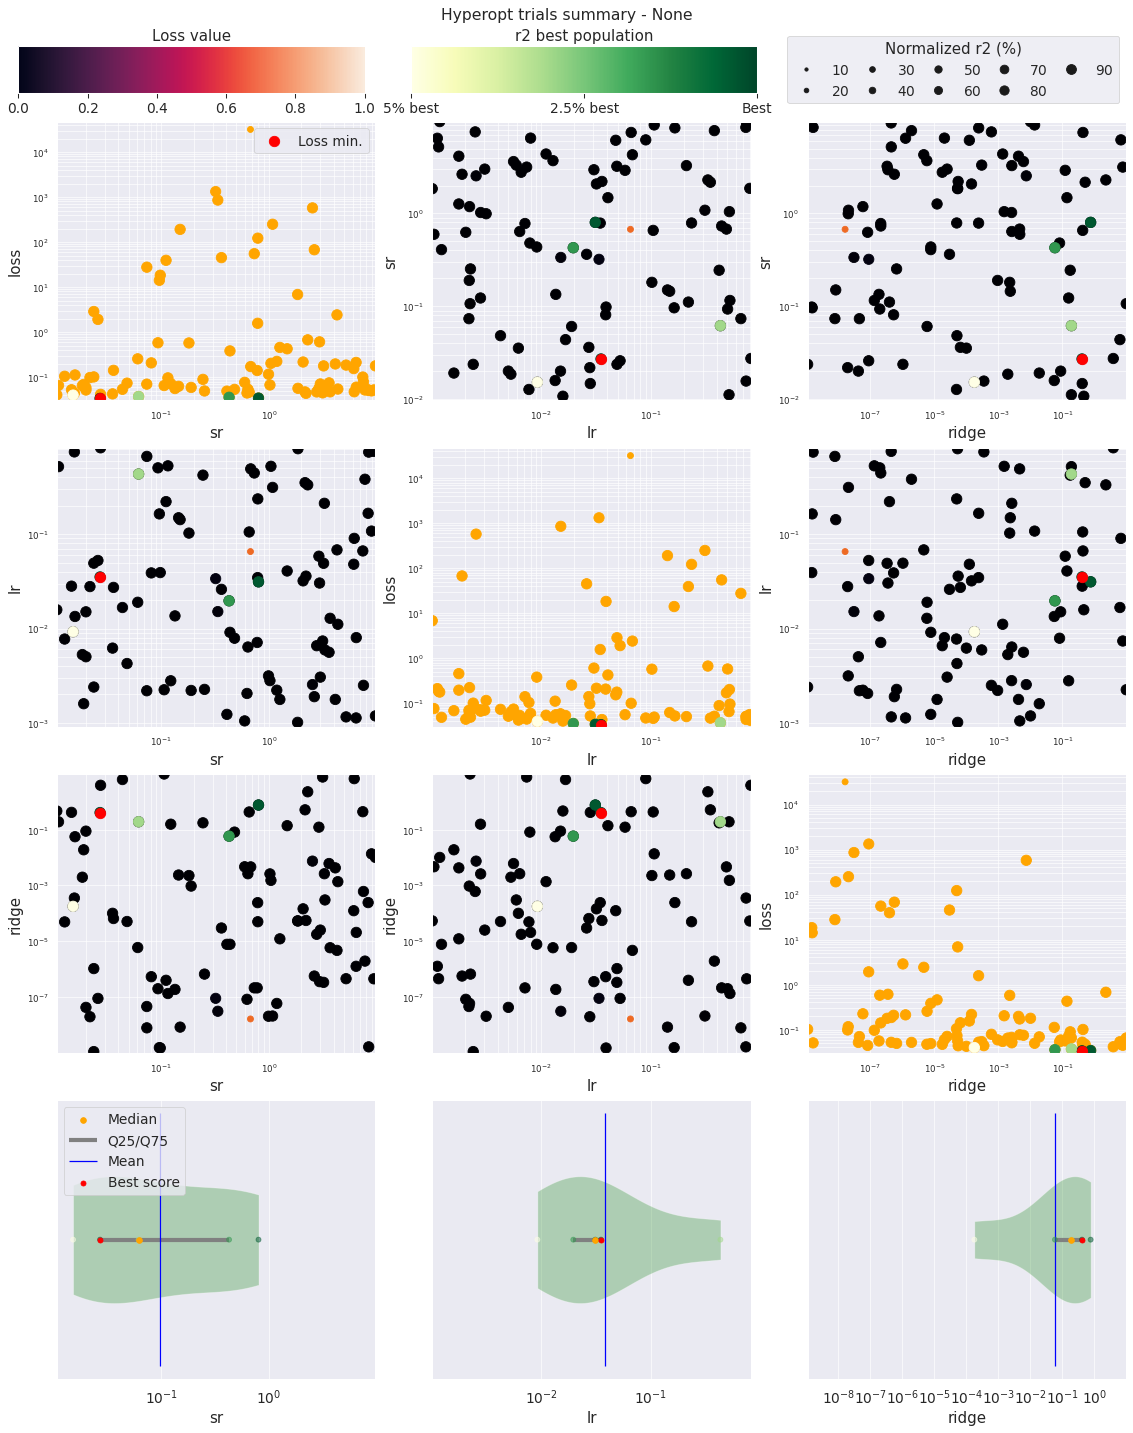

In [2]:
hyperopt_config = {
    "exp": "reservoir_feedback_1", 
    "hp_max_evals": 100, 
    "hp_method": "random", 
    "seed": 260_418, 
    "instances_per_trial": 1, 
    "hp_space": {
        "N": ["choice", 500],
        "sr": ["loguniform", 1e-2, 10],
        "lr": ["loguniform", 1e-3, 1],
        "input_scaling": ["loguniform", 1e-2, 1e2],
        "fb": ["loguniform", 1e-4, 1e1],
        "ridge": ["loguniform", 1e-9, 10],
        "seed": ["choice", 1234],
        "only_first": ["choice", True],
    }
}

os.makedirs(f"./hyperopt/{hyperopt_config['exp']}/", exist_ok=True)
with open(f"./hyperopt/{hyperopt_config['exp']}/config.json", "w+") as f:
    json.dump(hyperopt_config, f)

if (not os.path.exists(f"./hyperopt/{hyperopt_config['exp']}/report.png")):
    best = research(
        objective = esn.objective, 
        dataset = None,
        config_path = f"./hyperopt/{hyperopt_config['exp']}/config.json", 
        report_path = "./hyperopt/", 
    )

fig = plot_hyperopt_report(f"./hyperopt/{hyperopt_config['exp']}/", ("sr", "lr", "ridge"), metric="r2")
fig.savefig(f"./hyperopt/{hyperopt_config['exp']}/report.png")

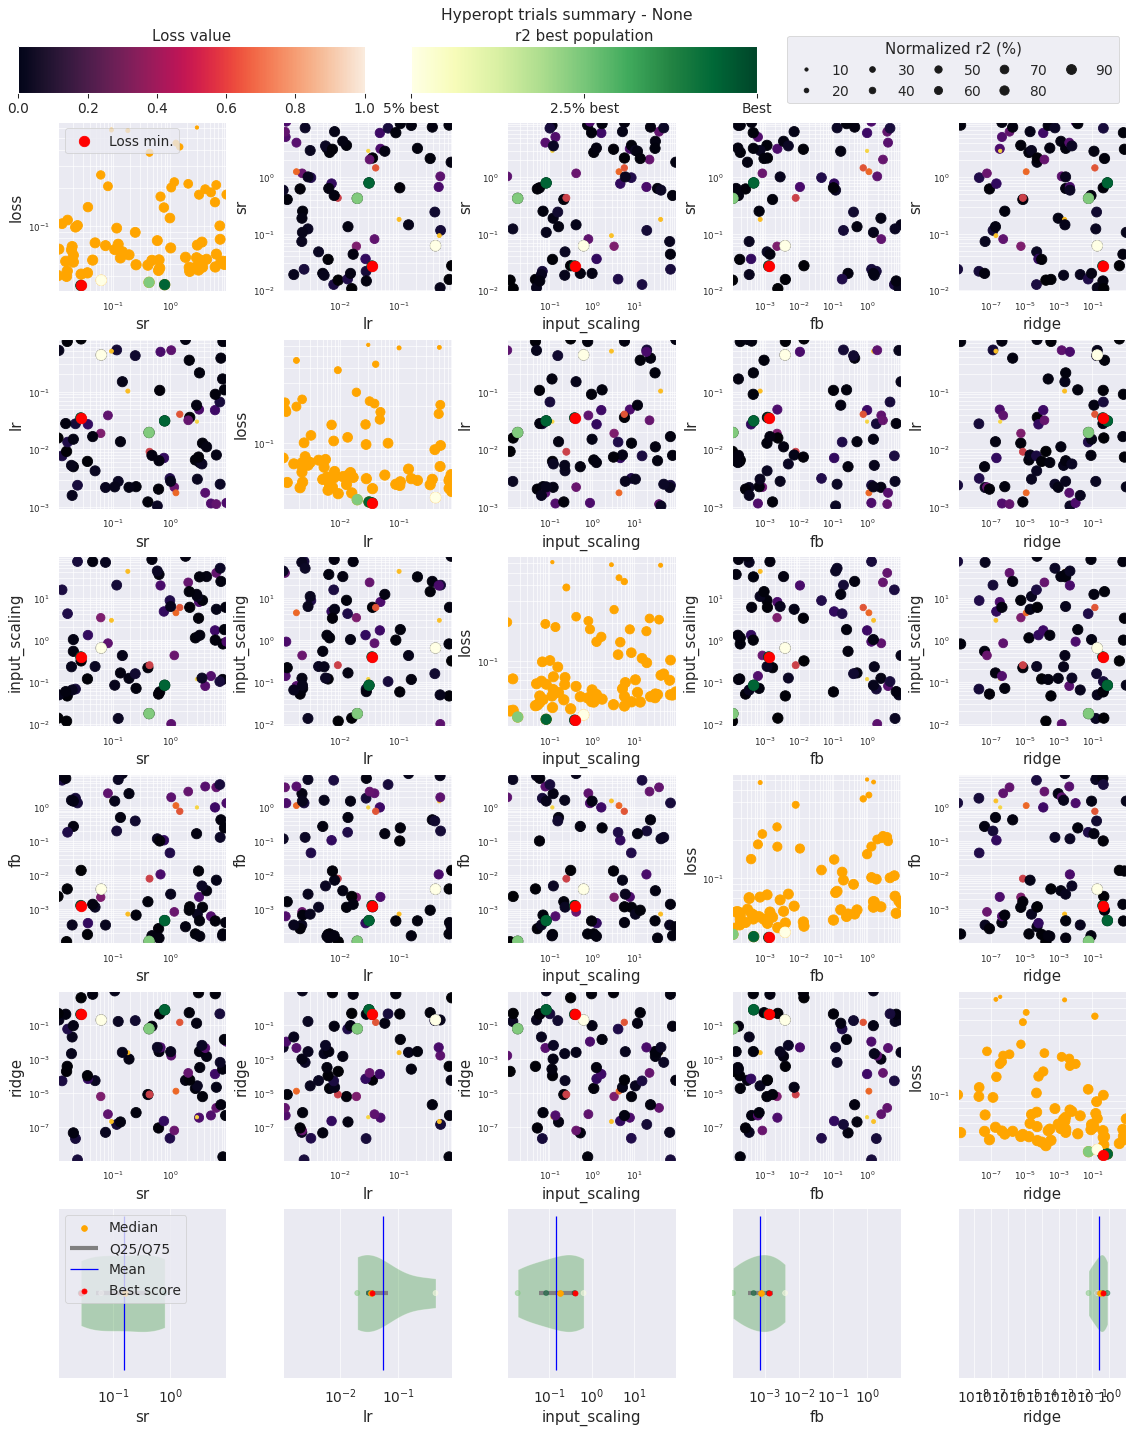

In [3]:
fig = plot_hyperopt_report(f"./hyperopt/{hyperopt_config['exp']}/", ("sr", "lr", "input_scaling", "fb", "ridge"), metric="r2")
fig.savefig(f"./hyperopt/{hyperopt_config['exp']}/trimmed_report.png")

### 2. Parameter exploration

  3%|▎         | 15/500 [08:34<4:36:17, 34.18s/trial, best loss: 0.030523852918879726]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=7.42044e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



  3%|▎         | 17/500 [09:44<4:38:22, 34.58s/trial, best loss: 0.030523852918879726]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=1.16754e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 11%|█▏        | 57/500 [32:49<4:16:21, 34.72s/trial, best loss: 0.02554966499854038] 

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=7.63019e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 21%|██▏       | 107/500 [1:01:29<3:46:09, 34.53s/trial, best loss: 0.02554966499854038]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=8.8608e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 22%|██▏       | 110/500 [1:03:13<3:44:00, 34.46s/trial, best loss: 0.02554966499854038]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=4.52533e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 34%|███▍      | 170/500 [1:37:35<3:07:29, 34.09s/trial, best loss: 0.02554966499854038]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=8.36856e-18): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 38%|███▊      | 191/500 [1:49:28<2:56:19, 34.24s/trial, best loss: 0.02554966499854038]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=6.04684e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 39%|███▉      | 197/500 [1:52:55<2:53:58, 34.45s/trial, best loss: 0.02554966499854038]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=9.66006e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 46%|████▌     | 230/500 [2:11:51<2:34:27, 34.32s/trial, best loss: 0.02554966499854038]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=8.65933e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 50%|█████     | 250/500 [2:23:21<2:23:11, 34.37s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=1.10482e-16): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 53%|█████▎    | 264/500 [2:31:24<2:16:38, 34.74s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=1.03173e-16): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 59%|█████▉    | 294/500 [2:48:38<1:57:35, 34.25s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=2.85916e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 67%|██████▋   | 334/500 [3:11:35<1:36:35, 34.91s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=2.024e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 67%|██████▋   | 337/500 [3:13:17<1:32:56, 34.21s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=6.78608e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 71%|███████   | 354/500 [3:23:00<1:23:19, 34.24s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=8.3472e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 71%|███████   | 355/500 [3:23:35<1:23:39, 34.62s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=8.67033e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 74%|███████▍  | 369/500 [3:31:42<1:15:55, 34.78s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=4.85471e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 78%|███████▊  | 388/500 [3:42:37<1:04:28, 34.54s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=7.61349e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 79%|███████▉  | 395/500 [3:46:36<59:50, 34.19s/trial, best loss: 0.025254272498604874]  

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=5.78203e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 79%|███████▉  | 397/500 [3:47:45<58:36, 34.14s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=3.57119e-18): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 80%|████████  | 401/500 [3:50:02<56:35, 34.30s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=3.40714e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 82%|████████▏ | 410/500 [3:55:09<51:19, 34.21s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=4.28072e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 82%|████████▏ | 411/500 [3:55:43<50:37, 34.13s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=7.39964e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 83%|████████▎ | 416/500 [3:58:34<48:12, 34.43s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=8.7559e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 87%|████████▋ | 435/500 [4:09:25<36:47, 33.96s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=7.31595e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 94%|█████████▎| 468/500 [4:28:24<18:12, 34.13s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=1.01953e-16): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 95%|█████████▍| 473/500 [4:31:15<15:20, 34.08s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=3.9596e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 96%|█████████▌| 479/500 [4:34:42<12:02, 34.41s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=8.95655e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



 99%|█████████▉| 497/500 [4:44:59<01:42, 34.32s/trial, best loss: 0.025254272498604874]

/home/paul/anaconda3/envs/cobiopro/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=1.00979e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")



100%|██████████| 500/500 [4:46:42<00:00, 34.40s/trial, best loss: 0.025254272498604874]


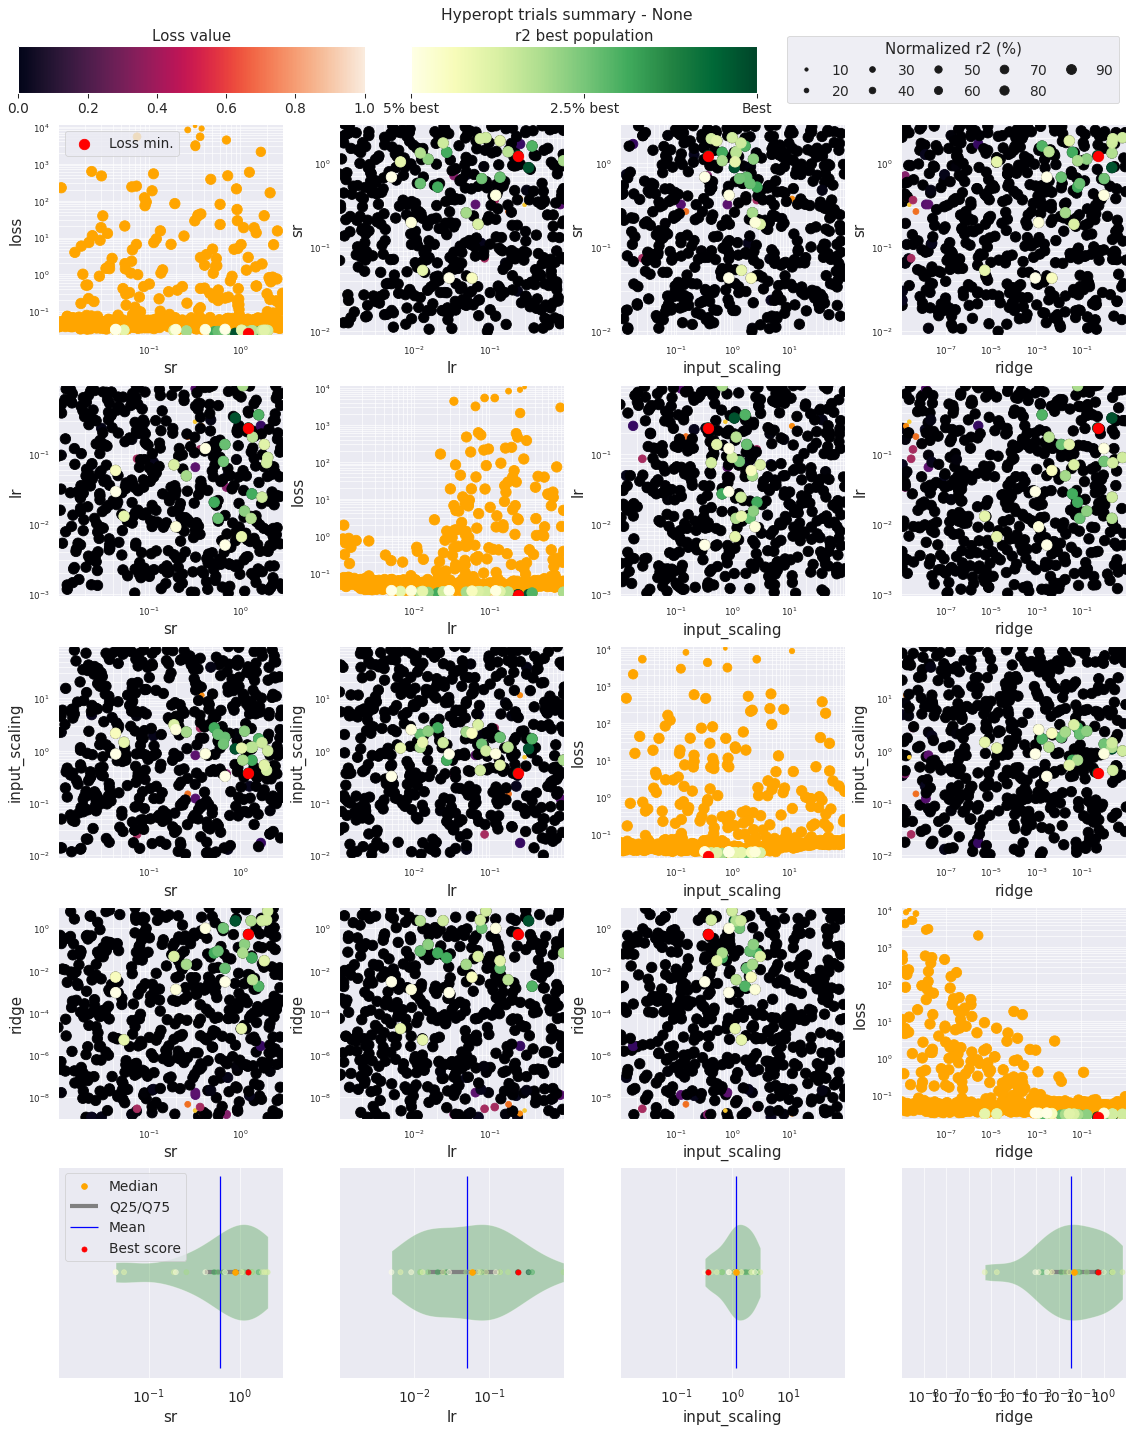

In [2]:
hyperopt_config = {
    "exp": "reservoir_exploration_1", 
    "hp_max_evals": 500, 
    "hp_method": "random", 
    "seed": 260_418, 
    "instances_per_trial": 1, 
    "hp_space": {
        "N": ["choice", 500],
        "sr": ["loguniform", 1e-2, 3],
        "lr": ["loguniform", 1e-3, 1],
        "input_scaling": ["loguniform", 1e-2, 1e2],
        "ridge": ["loguniform", 1e-9, 10],
        "seed": ["choice", 1234],
        "only_first": ["choice", True],
    }
}

os.makedirs(f"./hyperopt/{hyperopt_config['exp']}/", exist_ok=True)
with open(f"./hyperopt/{hyperopt_config['exp']}/config.json", "w+") as f:
    json.dump(hyperopt_config, f)

if (not os.path.exists(f"./hyperopt/{hyperopt_config['exp']}/report.png")):
    best = research(
        objective = esn.objective, 
        dataset = None,
        config_path = f"./hyperopt/{hyperopt_config['exp']}/config.json", 
        report_path = "./hyperopt/", 
    )

fig = plot_hyperopt_report(f"./hyperopt/{hyperopt_config['exp']}/", ("sr", "lr", "input_scaling", "ridge"), metric="r2")
fig.savefig(f"./hyperopt/{hyperopt_config['exp']}/report.png")

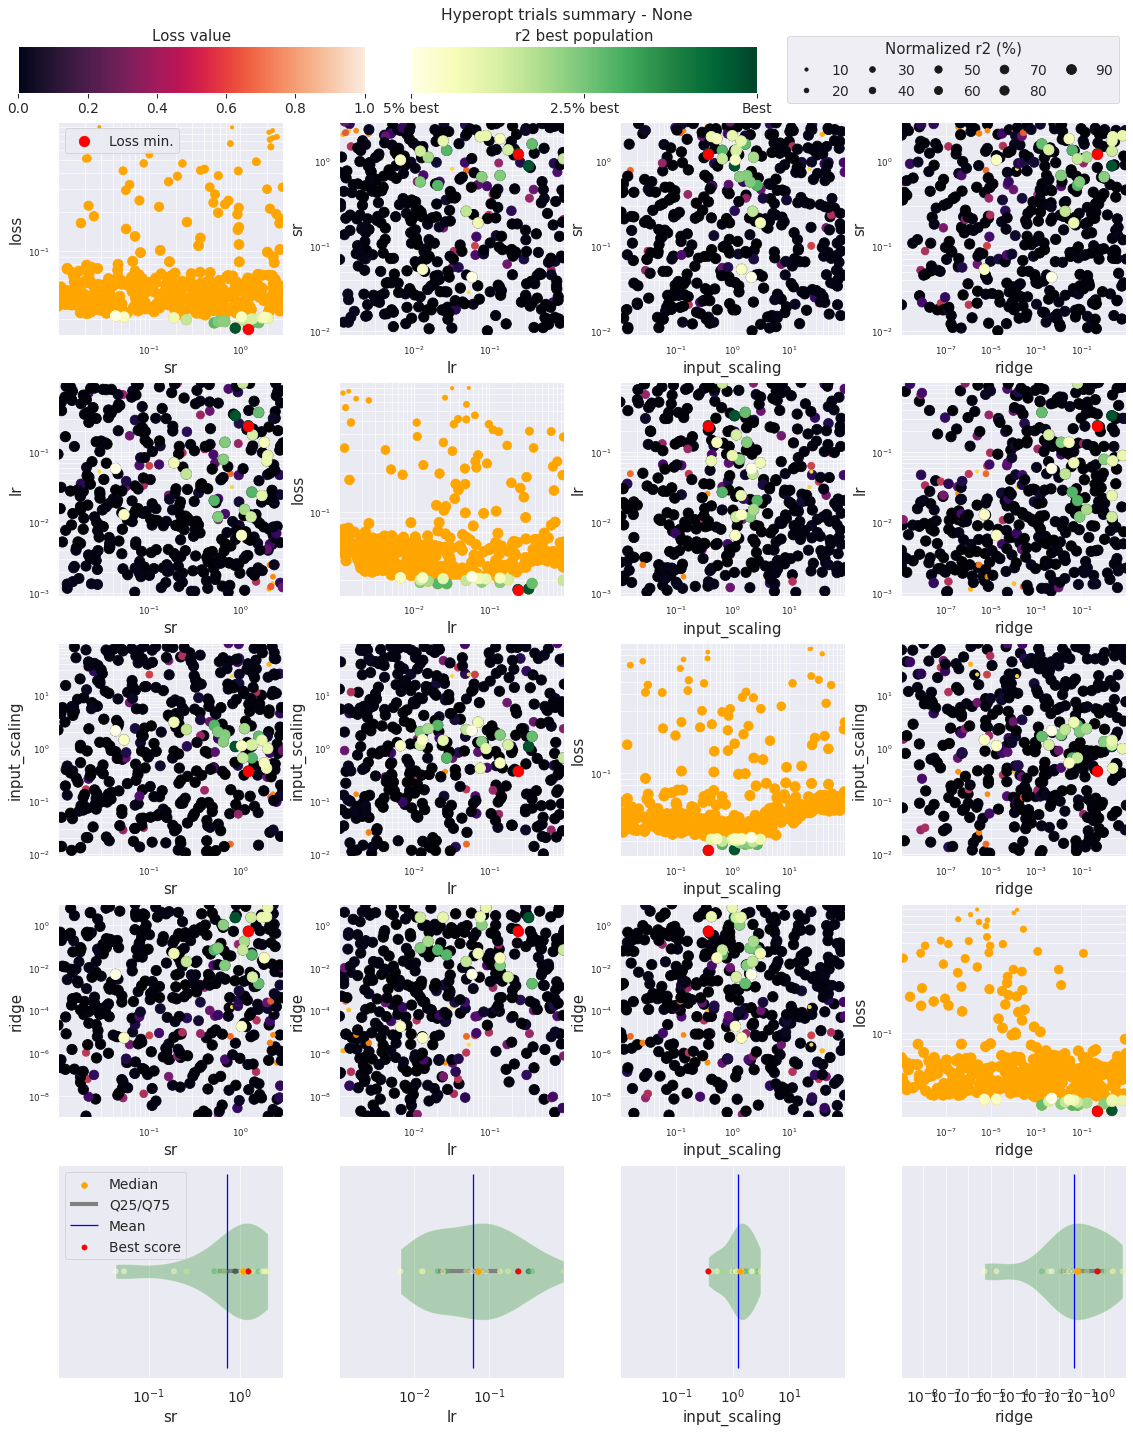

In [3]:
fig = plot_hyperopt_report(f"./hyperopt/{hyperopt_config['exp']}/", ("sr", "lr", "input_scaling", "ridge"), metric="r2")
fig.savefig(f"./hyperopt/{hyperopt_config['exp']}/trimmed_report.png")

### 3. Reservoir size exploration

  0%|          | 0/500 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 500/500 [6:35:38<00:00, 47.48s/trial, best loss: 0.02035334996159977]  


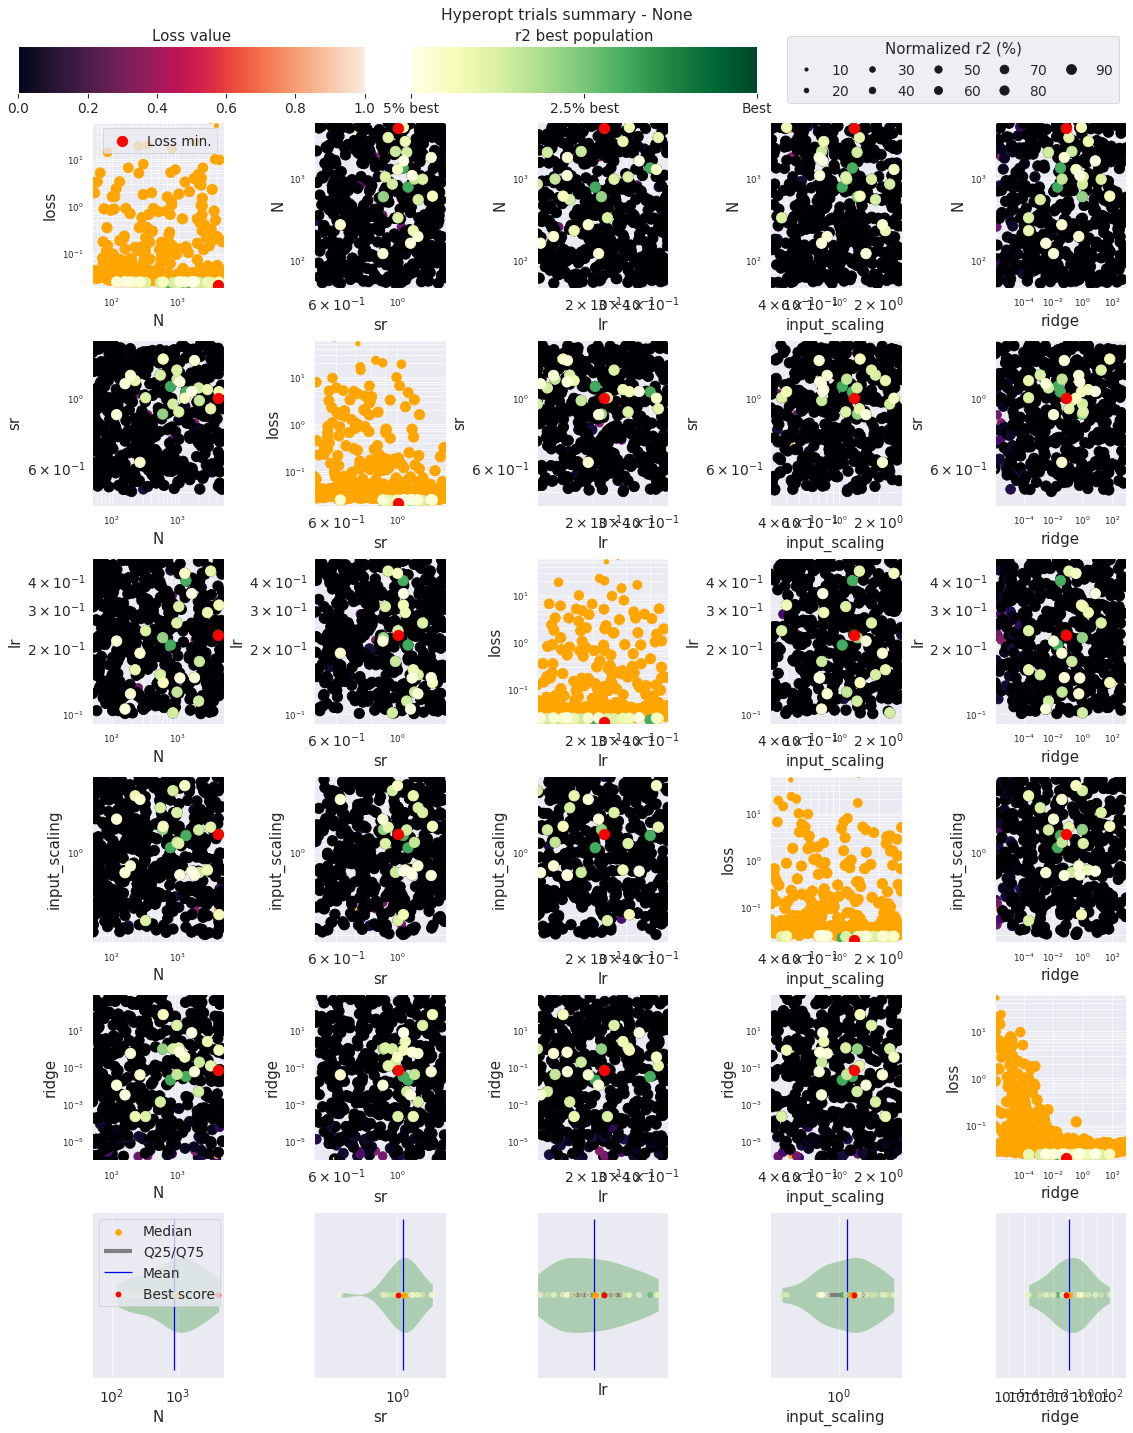

In [4]:
hyperopt_config = {
    "exp": "reservoir_size_1", 
    "hp_max_evals": 500, 
    "hp_method": "random", 
    "seed": 260_418, 
    "instances_per_trial": 1, 
    "hp_space": {
        "N": ["loguniform", 5e1, 5e3],
        "sr": ["loguniform", 5e-1, 1.5],
        "lr": ["loguniform", 1e-1, 5e-1],
        "input_scaling": ["loguniform", 0.3, 3],
        "ridge": ["loguniform", 1e-6, 1e3],
        "seed": ["choice", 1234],
        "only_first": ["choice", True],
    }
}

os.makedirs(f"./hyperopt/{hyperopt_config['exp']}/", exist_ok=True)
with open(f"./hyperopt/{hyperopt_config['exp']}/config.json", "w+") as f:
    json.dump(hyperopt_config, f)

if (not os.path.exists(f"./hyperopt/{hyperopt_config['exp']}/report.png")):
    best = research(
        objective = esn.objective, 
        dataset = None,
        config_path = f"./hyperopt/{hyperopt_config['exp']}/config.json", 
        report_path = "./hyperopt/", 
    )

fig = plot_hyperopt_report(f"./hyperopt/{hyperopt_config['exp']}/", ("N", "sr", "lr", "input_scaling", "ridge"), metric="r2")
fig.savefig(f"./hyperopt/{hyperopt_config['exp']}/report.png")

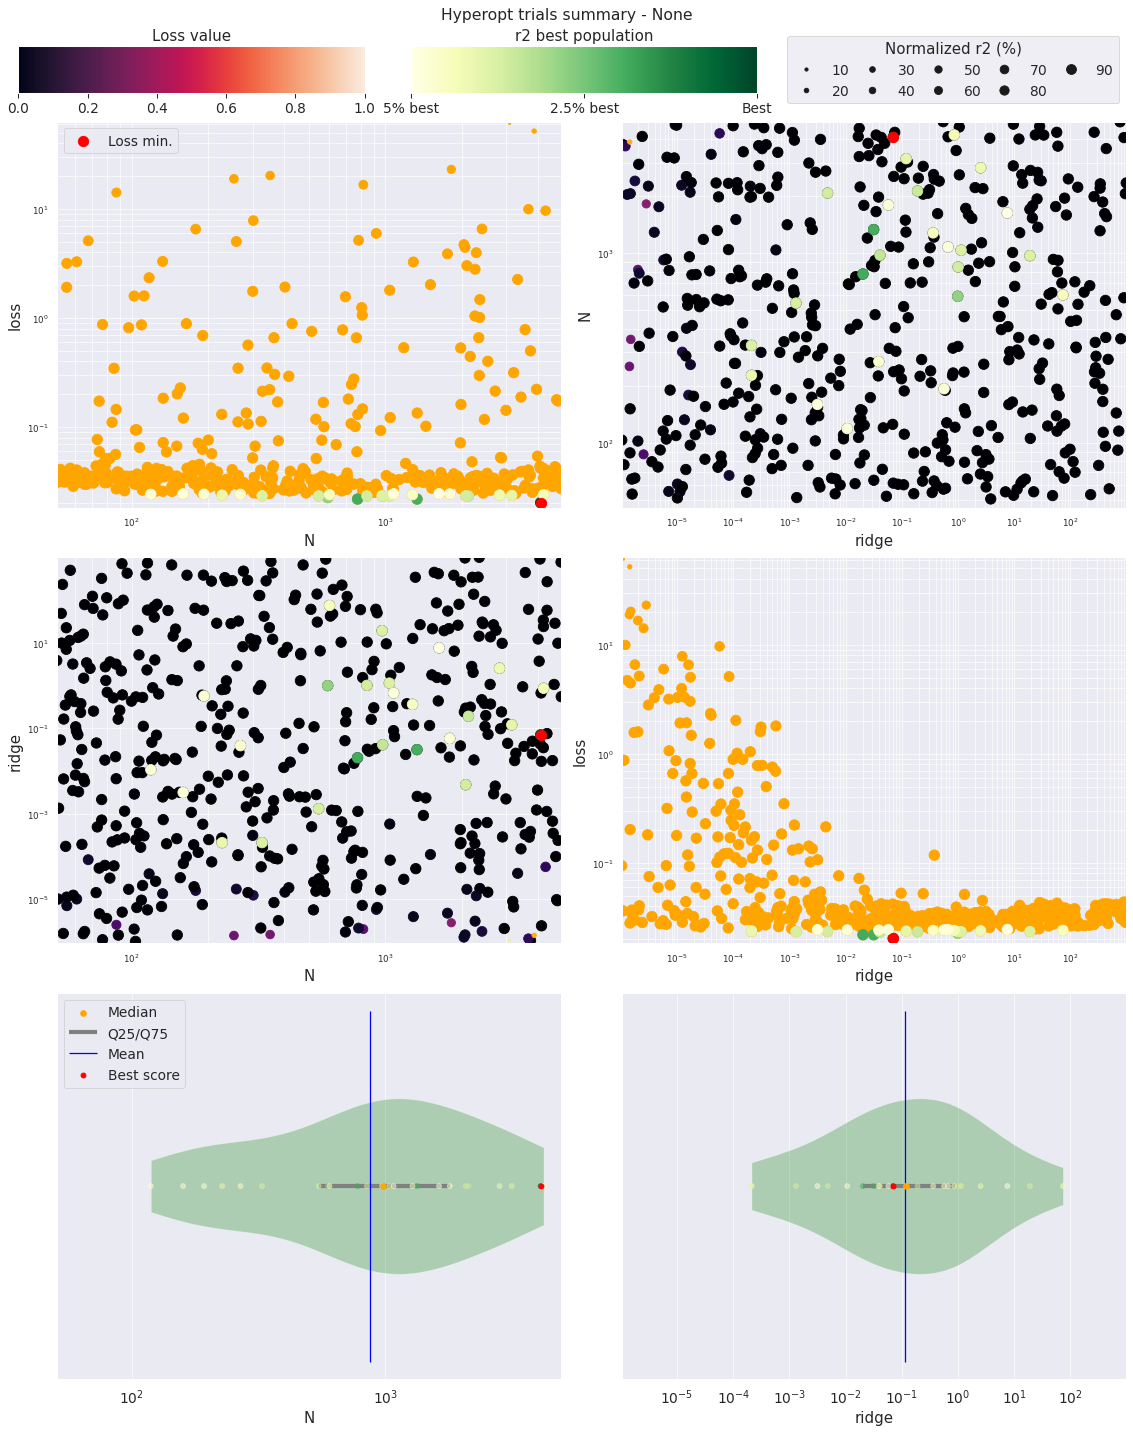

In [5]:
fig = plot_hyperopt_report(f"./hyperopt/{hyperopt_config['exp']}/", ("N", "ridge"), metric="r2")
fig.savefig(f"./hyperopt/{hyperopt_config['exp']}/report.png")

#### Plot time vs reservoir size

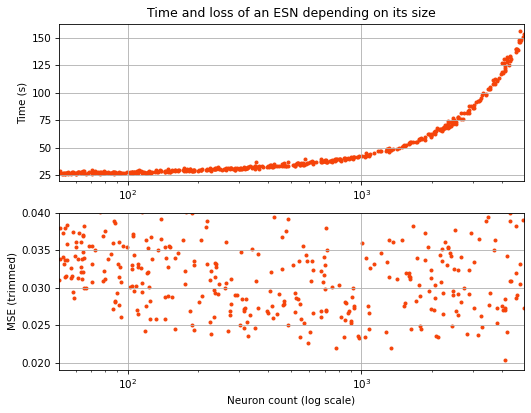

In [19]:
import reservoirpy.hyper as h

results = h._hyperplot._get_results(f"hyperopt/{'reservoir_size_1'}")

Ns = [result["current_params"]["N"] for result in results]
durations = [result["returned_dict"]["duration"] for result in results]
losses = [result["returned_dict"]["loss"] for result in results]

plt.figure(figsize=(8, 6))

plt.subplot(2,1,1)
plt.grid()
plt.scatter(Ns, durations, s=8)
plt.xscale("log")
plt.title("Time and loss of an ESN depending on its size")
plt.ylabel("Time (s)")

plt.subplot(2,1,2)
plt.ylim(0.019, 0.04)
plt.grid()
plt.scatter(Ns, losses, s=8)
plt.xscale("log")
plt.xlabel("Neuron count (log scale)")
plt.ylabel("MSE (trimmed)")

plt.show()